Iteration 1: Best fitness= 7.1744
Iteration 2: Best fitness= 6.7162
Iteration 3: Best fitness= 4.7358
Iteration 4: Best fitness= 0.1119
Iteration 5: Best fitness= 0.0757
Iteration 6: Best fitness= 0.0095
Iteration 7: Best fitness= 0.0068
Iteration 8: Best fitness= 0.0048
Iteration 9: Best fitness= 0.0041
Iteration 10: Best fitness= 0.0031
Iteration 11: Best fitness= 0.0023
Iteration 12: Best fitness= 0.0020
Iteration 13: Best fitness= 0.0016
Iteration 14: Best fitness= 0.0013
Iteration 15: Best fitness= 0.0012
Iteration 16: Best fitness= 0.0010
Iteration 17: Best fitness= 0.0009
Iteration 18: Best fitness= 0.0008
Iteration 19: Best fitness= 0.0007
Iteration 20: Best fitness= 0.0006
Iteration 21: Best fitness= 0.0005
Iteration 22: Best fitness= 0.0005
Iteration 23: Best fitness= 0.0004
Iteration 24: Best fitness= 0.0004
Iteration 25: Best fitness= 0.0004
Iteration 26: Best fitness= 0.0003
Iteration 27: Best fitness= 0.0003
Iteration 28: Best fitness= 0.0003
Iteration 29: Best fitness= 0

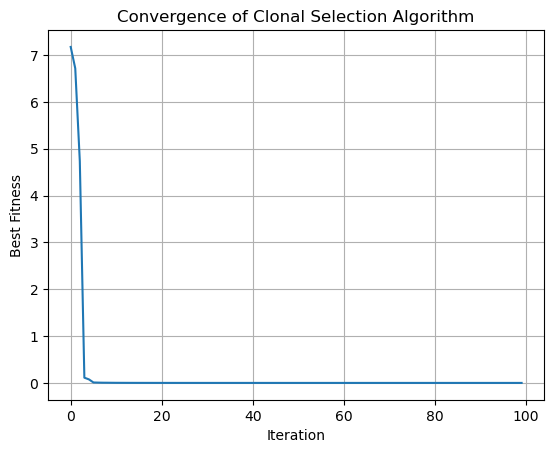

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Rastrigin Function (for testing, global minimum at 0)
def fitness_function(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])
# Hyperparameters
POP_SIZE = 20
DIM = 2
ITERATIONS = 100
CLONE_RATE = 5
MUTATION_RATE = 0.1
REPLACEMENT_RATE = 0.2
X_BOUND = (-5.12, 5.12)
# Initialize population
def initialize_population():
    return [np.random.uniform(X_BOUND[0], X_BOUND[1], DIM) for _ in range(POP_SIZE)]
# Mutation (Gaussian)
def mutate(solution, affinity):
    mutation_strength = MUTATION_RATE / (affinity + 1e-6) # inverse to fitness
    return solution + np.random.normal(0, mutation_strength, size=len(solution))

# Main Clonal Selection Algorithm
def clonal_selection():
    population = initialize_population()
    best_scores = []
    for iteration in range(ITERATIONS):
     # Evaluate fitness (lower is beƩer)
        fitness = np.array([fitness_function(sol) for sol in population])
        sorted_indices = np.argsort(fitness)
        population = [population[i] for i in sorted_indices]
        fitness = fitness[sorted_indices]
        best_scores.append(fitness[0])
         # Select top candidates
        n_select = int(POP_SIZE / 2)
        selected = population[:n_select]
         # Cloning and mutation
        clones = []
        for i, antibody in enumerate(selected):
            n_clones = int(CLONE_RATE * (1 - i / n_select)) + 1
            affinity = 1.0 / (fitness[i] + 1e-6)
            for _ in range(n_clones):
                clone = mutate(antibody, affinity)
                clone = np.clip(clone, X_BOUND[0], X_BOUND[1])
                clones.append(clone)
        # Evaluate all clones
        all_candidates = population + clones
        all_fitness = [fitness_function(c) for c in all_candidates]
        best_indices = np.argsort(all_fitness)[:POP_SIZE]
        population = [all_candidates[i] for i in best_indices]
         # Introduce diversity
        n_replace = int(REPLACEMENT_RATE * POP_SIZE)
        for i in range(1, n_replace + 1):
            population[-i] = np.random.uniform(X_BOUND[0], X_BOUND[1], DIM)
        print(f"Iteration {iteration+1}: Best fitness= {best_scores[-1]:.4f}") 
    return population[0], best_scores

# Run
best_solution, history = clonal_selection()
print("\nBest solution:", best_solution)
print("Best fitness:", fitness_function(best_solution))
# Plot convergence
plt.plot(history)
plt.title("Convergence of Clonal Selection Algorithm")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()

Iteration 1: Best fitness= 9.0434
Iteration 2: Best fitness= 5.2345
Iteration 3: Best fitness= 5.2345
Iteration 4: Best fitness= 5.2345
Iteration 5: Best fitness= 3.7951
Iteration 6: Best fitness= 3.2358
Iteration 7: Best fitness= 2.5972
Iteration 8: Best fitness= 2.5972
Iteration 9: Best fitness= 0.1122
Iteration 10: Best fitness= 0.0034
Iteration 11: Best fitness= 0.0026
Iteration 12: Best fitness= 0.0021
Iteration 13: Best fitness= 0.0018
Iteration 14: Best fitness= 0.0014
Iteration 15: Best fitness= 0.0013
Iteration 16: Best fitness= 0.0010
Iteration 17: Best fitness= 0.0008
Iteration 18: Best fitness= 0.0007
Iteration 19: Best fitness= 0.0006
Iteration 20: Best fitness= 0.0006
Iteration 21: Best fitness= 0.0005
Iteration 22: Best fitness= 0.0004
Iteration 23: Best fitness= 0.0004
Iteration 24: Best fitness= 0.0004
Iteration 25: Best fitness= 0.0004
Iteration 26: Best fitness= 0.0003
Iteration 27: Best fitness= 0.0003
Iteration 28: Best fitness= 0.0003
Iteration 29: Best fitness= 0

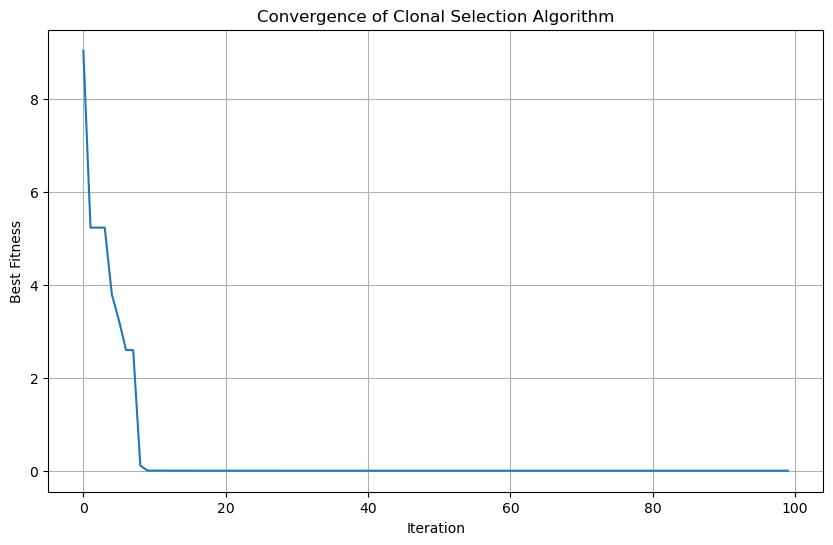

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rastrigin Function (for testing, global minimum at 0)
def fitness_function(x):
    A = 10
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Hyperparameters
POP_SIZE = 20
DIM = 2
ITERATIONS = 100
CLONE_RATE = 5
MUTATION_RATE = 0.1
REPLACEMENT_RATE = 0.2
X_BOUND = (-5.12, 5.12)

# Initialize population
def initialize_population():
    return [np.random.uniform(X_BOUND[0], X_BOUND[1], DIM) for _ in range(POP_SIZE)]

# Mutation (Gaussian)
def mutate(solution, affinity):
    mutation_strength = MUTATION_RATE / (affinity + 1e-6)  # inverse to fitness
    return solution + np.random.normal(0, mutation_strength, size=len(solution))

# Main Clonal Selection Algorithm
def clonal_selection():
    population = initialize_population()
    best_scores = []
    
    for iteration in range(ITERATIONS):
        # Evaluate fitness (lower is better)
        fitness = np.array([fitness_function(sol) for sol in population])
        
        # Check for negative values and report if found
        if np.any(fitness < 0):
            print(f"Warning: Negative fitness found in iteration {iteration+1}")
            print(f"Min fitness: {np.min(fitness)}")
            
        # Sort population by fitness
        sorted_indices = np.argsort(fitness)
        population = [population[i] for i in sorted_indices]
        fitness = fitness[sorted_indices]
        
        best_scores.append(fitness[0])
        
        # Select top candidates
        n_select = int(POP_SIZE / 2)
        selected = population[:n_select]
        
        # Cloning and mutation
        clones = []
        for i, antibody in enumerate(selected):
            # Calculate number of clones based on rank
            n_clones = int(CLONE_RATE * (1 - i / n_select)) + 1
            # Calculate affinity (higher for better solutions)
            affinity = 1.0 / (fitness[i] + 1e-6)
            
            for _ in range(n_clones):
                clone = mutate(antibody.copy(), affinity)  # Make sure to copy the antibody
                clone = np.clip(clone, X_BOUND[0], X_BOUND[1])
                clones.append(clone)
        
        # Evaluate all clones
        all_candidates = population + clones
        all_fitness = np.array([fitness_function(c) for c in all_candidates])
        
        # Keep only the best POP_SIZE solutions
        best_indices = np.argsort(all_fitness)[:POP_SIZE]
        population = [all_candidates[i] for i in best_indices]
        
        # Introduce diversity
        n_replace = int(REPLACEMENT_RATE * POP_SIZE)
        for i in range(1, n_replace + 1):
            population[-i] = np.random.uniform(X_BOUND[0], X_BOUND[1], DIM)
        
        print(f"Iteration {iteration+1}: Best fitness= {best_scores[-1]:.4f}")
    
    # Return best solution and history
    best_solution = population[0]
    return best_solution, best_scores

# Set random seed for reproducibility
np.random.seed(42)

# Run
best_solution, history = clonal_selection()
print("\nBest solution:", best_solution)
best_fitness = fitness_function(best_solution)
print("Best fitness:", best_fitness)

# Plot convergence with linear scale (as in the original code)
plt.figure(figsize=(10, 6))
plt.plot(history)
plt.title("Convergence of Clonal Selection Algorithm")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()